In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# Checking Available Devices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2024-02-18 10:01:47.182574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 10:01:47.182871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 10:01:47.385033: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12800904119986964130
xla_global_id: -1
]


In [3]:
train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
# Import required Packages
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [5]:
x_train = train.drop(['label'],axis=1).values
y_train = train['label']

In [6]:
x_train = x_train.reshape(len(x_train),28,28)
x_train.shape

(42000, 28, 28)

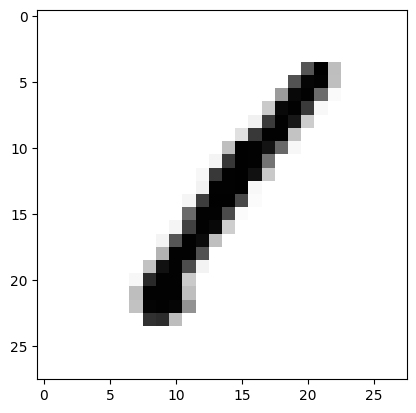

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='Greys')

In [8]:
x_train = x_train.reshape(42000,28,28,1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers,models

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [16]:
cnn.fit(x_train,y_train,epochs=10, validation_split=0.2)

Epoch 1/10
1050/1050 [==============================] - 19s 17ms/step - loss: 0.9673 - accuracy: 0.7181 - val_loss: 0.1687 - val_accuracy: 0.9556
Epoch 2/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.3651 - accuracy: 0.8974 - val_loss: 0.1042 - val_accuracy: 0.9710
Epoch 3/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.2338 - accuracy: 0.9335 - val_loss: 0.0899 - val_accuracy: 0.9761
Epoch 4/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.1756 - accuracy: 0.9506 - val_loss: 0.0701 - val_accuracy: 0.9814
Epoch 5/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.1372 - accuracy: 0.9601 - val_loss: 0.0742 - val_accuracy: 0.9807
Epoch 6/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.1219 - accuracy: 0.9641 - val_loss: 0.0736 - val_accuracy: 0.9801
Epoch 7/10
1050/1050 [==============================] - 17s 17ms/step - loss: 0.1041 - accuracy: 0.9694 - val_loss: 0.0688 -

In [17]:

x_test=test.values
x_test = x_test.reshape(28000, 28, 28, 1)
pred=cnn.predict(x_test)
y_test=[np.argmax(element) for element in pred]


875/875 [==============================] - 5s 5ms/step


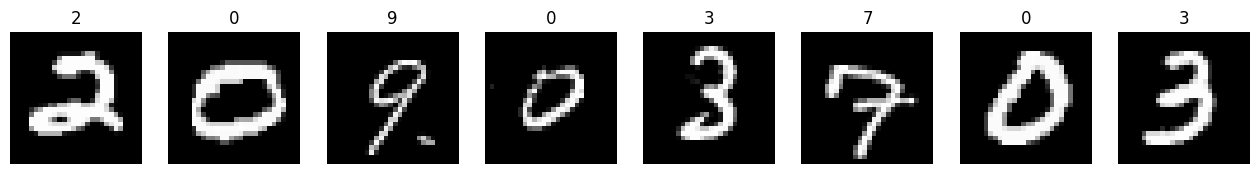

In [18]:
fig, axes = plt.subplots(ncols=8, nrows=1, figsize=(16, 2))
for i in range(8):
    axes[i].imshow(x_test[i].reshape((28, 28)), cmap='gray') 
    axes[i].axis('off')
    axes[i].set_title(y_test[i])
plt.show()


In [2]:
cnn.save('digit.h5')

NameError: name 'cnn' is not defined

In [1]:
!pip install Tensorflow


Defaulting to user installation because normal site-packages is not writeable
     ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/475.2 MB 1.6 MB/s eta 0:04:31^C
     ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/475.2 MB 1.6 MB/s eta 0:04:33
ERROR: Operation cancelled by user


In [33]:
x = np.zeros((10,10))

In [58]:
x[:,:] = 255

In [61]:
x[2:8,2:8] = 0
#x[2:8,2:8] = 0
x[3:7,3:7] = 255
#x[3:7,3:7] = 255

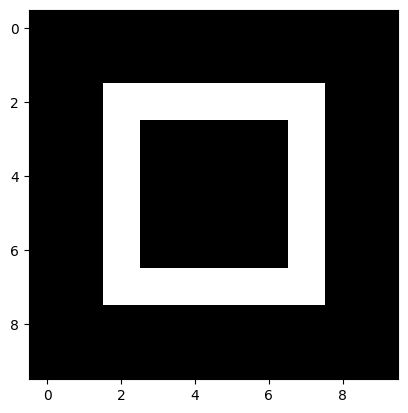

In [62]:
plt.imshow(x,cmap='Greys')